In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


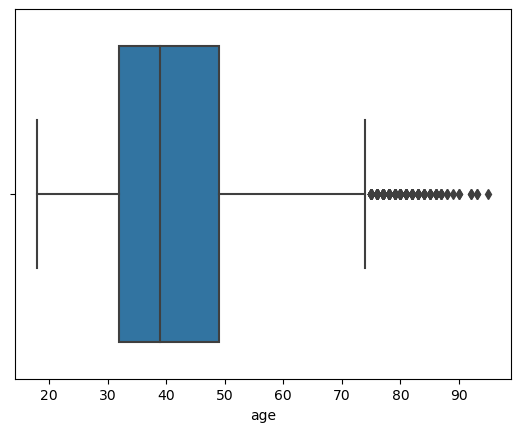

In [5]:
g = sns.boxplot(x=bank["age"])

C:\Users\HP\AppData\Local\Temp\ipykernel_12368\1977840384.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank.age, bins=100)


<Axes: xlabel='age', ylabel='Density'>

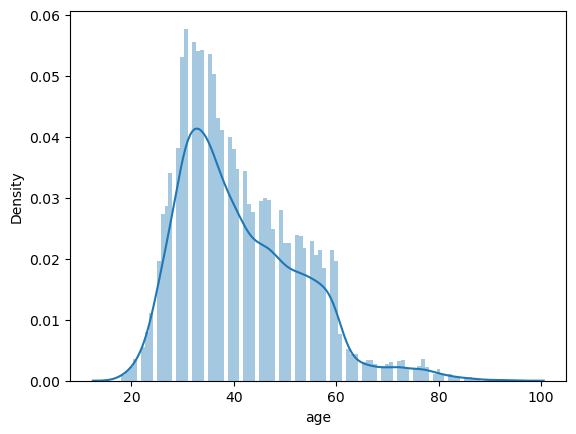

In [6]:
sns.distplot(bank.age, bins=100)

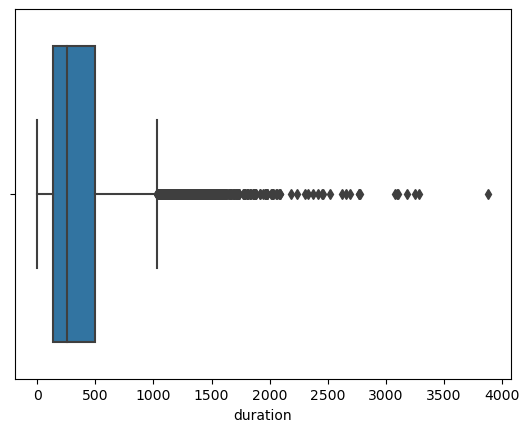

In [7]:
g = sns.boxplot(x=bank["duration"])

C:\Users\HP\AppData\Local\Temp\ipykernel_12368\1784427431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank.duration, bins=100)


<Axes: xlabel='duration', ylabel='Density'>

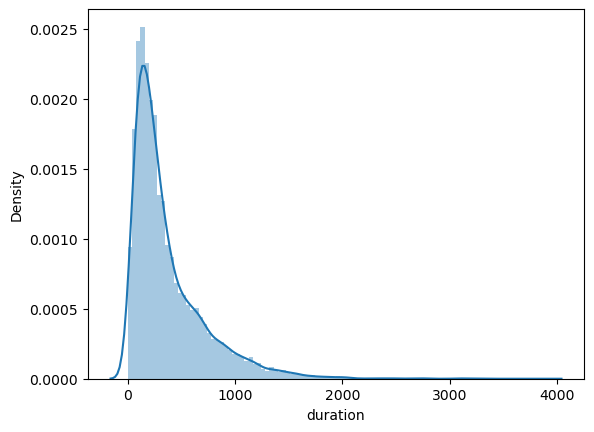

In [8]:
sns.distplot(bank.duration, bins=100)

In [9]:
bank_data = bank.copy()

In [10]:
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [11]:
bank_data.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [12]:
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [13]:
bank_data.job.value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [14]:
bank_data.poutcome.value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [15]:
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

poutcome
unknown    8863
failure    1228
success    1071
Name: count, dtype: int64

In [16]:
bank_data.drop('contact', axis=1, inplace=True)

In [17]:
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [18]:
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [19]:
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [20]:
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [21]:
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [22]:
print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [23]:
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [24]:
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
bank_data.drop('pdays', axis=1, inplace = True)

In [25]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,10000,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,10000,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,10000,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,172,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,10000,0,unknown,0,0,0,0,0.000100


In [26]:
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,10000,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
1,56,45,1467,1,10000,0,0,0,0,1,...,False,True,False,False,True,False,False,False,False,True
2,41,1270,1389,1,10000,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
3,55,2476,579,1,10000,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
4,54,184,673,2,10000,0,0,0,0,1,...,False,True,False,False,False,True,False,False,False,True


In [29]:
bank_with_dummies.shape

(11162, 28)

In [30]:
bank_with_dummies.describe()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,7509.521054,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124
std,11.913369,3225.413326,347.128386,2.722077,4265.868523,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686
min,18.000000,-6847.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100
25%,32.000000,122.000000,138.000000,1.000000,521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100
50%,39.000000,550.000000,255.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100
75%,49.000000,1708.000000,496.000000,3.000000,10000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919
max,95.000000,81204.000000,3881.000000,63.000000,10000.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000


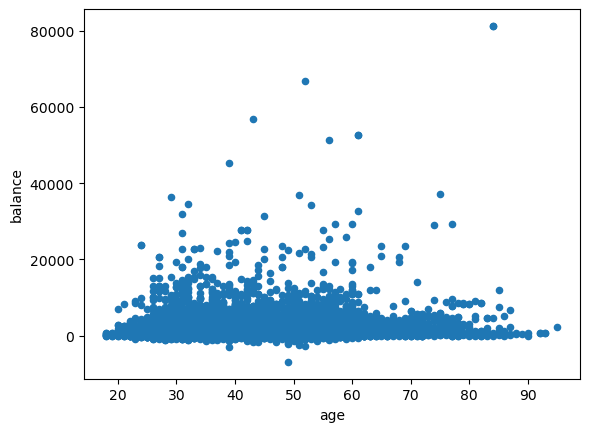

In [31]:
bank_with_dummies.plot(kind='scatter', x='age', y='balance');


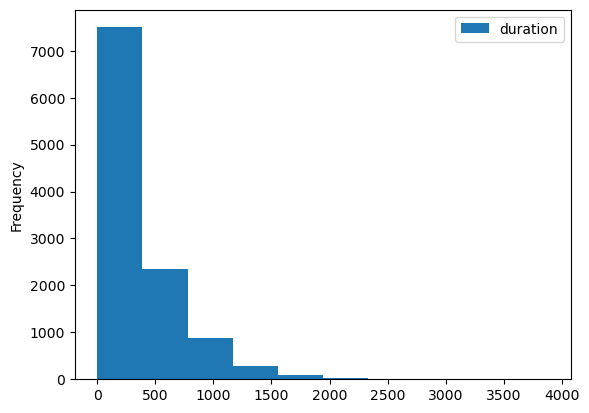

In [32]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [33]:
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,6467.527699,1.170354,0.009832,0.365854,0.091511,1.0,0.004238
std,13.497781,3501.104777,392.525262,1.921826,4709.136115,2.553272,0.098676,0.481714,0.288361,0.0,0.035686
min,18.000000,-3058.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100
25%,31.000000,210.000000,244.000000,1.000000,195.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100
50%,38.000000,733.000000,426.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100
75%,50.000000,2159.000000,725.000000,3.000000,10000.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128
max,95.000000,81204.000000,3881.000000,32.000000,10000.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [34]:
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [35]:
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

<Axes: xlabel='job', ylabel='deposit_cat'>

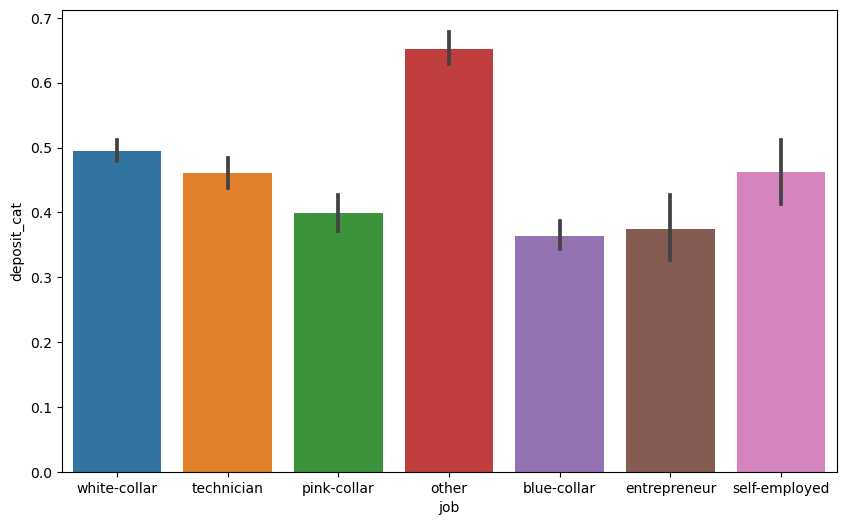

In [36]:
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

<Axes: xlabel='poutcome', ylabel='duration'>

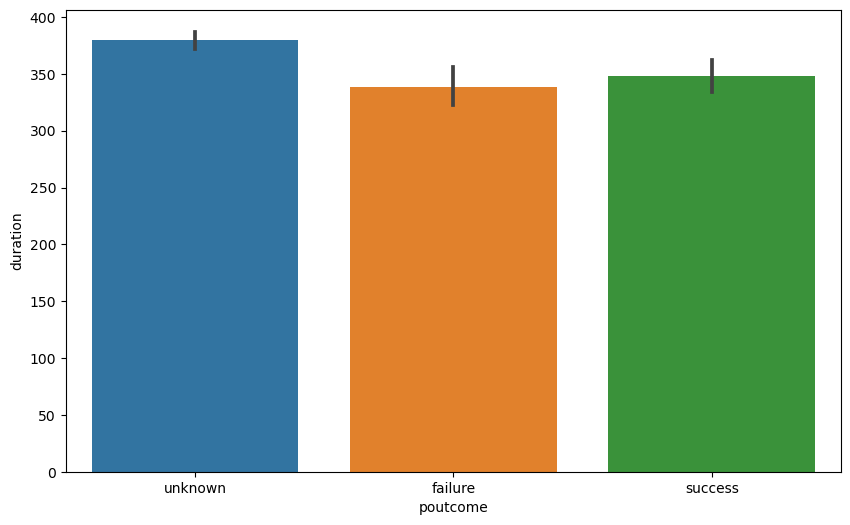

In [37]:
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [38]:
bankcl = bank_with_dummies

In [39]:
corr = bankcl.corr()
corr

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,-0.027589,0.020169,-0.011425,-0.168700,-0.031418,0.034901,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,-0.046627,0.030805,-0.060954,-0.077092,-0.084589,0.081129,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,0.043951,-0.026716,-0.009760,0.035051,-0.001914,0.451919,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,0.131490,-0.049699,0.030975,0.006660,0.034722,-0.128081,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
pdays,-0.027589,-0.046627,0.043951,0.131490,1.000000,-0.622197,0.053787,0.026349,0.059783,-0.231811,...,0.035538,0.013835,-0.039228,0.061388,0.013186,-0.056438,-0.004758,-0.599364,-0.561202,0.872474
previous,0.020169,0.030805,-0.026716,-0.049699,-0.622197,1.000000,-0.035273,-0.000840,-0.022668,0.139867,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,0.053787,-0.035273,1.000000,0.011076,0.076434,-0.040680,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,0.026349,-0.000840,0.011076,1.000000,0.076761,-0.203888,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,0.059783,-0.022668,0.076434,0.076761,1.000000,-0.110580,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,-0.231811,0.139867,-0.040680,-0.203888,-0.110580,1.000000,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

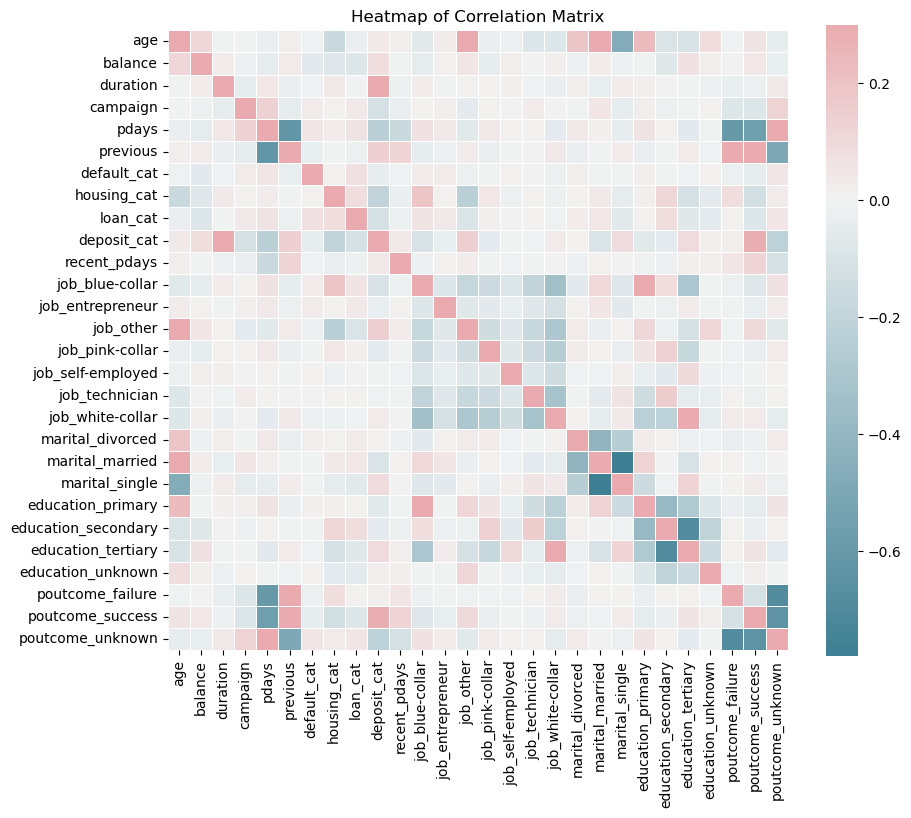

In [40]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [41]:
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


In [45]:
data_drop_deposit = bankcl.drop(columns='deposit_cat')
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposit, label, test_size=0.2, random_state=50)

In [46]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [47]:
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.770411020271027
Testing score:  0.7572772055530677


In [48]:
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [49]:
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7796686072548141


In [50]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7362292879534259


In [51]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7362292879534259


In [52]:
dt2.classes_

array([0, 1], dtype=int64)

In [57]:
features = data_drop_deposit.columns.tolist()
features


['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [58]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
pdays............... 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


In [60]:
print("Mean duration   : ", data_drop_deposit.duration.mean())
print("Maximum duration: ", data_drop_deposit.duration.max())
print("Minimum duration: ", data_drop_deposit.duration.min())


Mean duration   :  371.99381831213043
Maximum duration:  3881
Minimum duration:  2
